In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('../')
from python_code import model
os.chdir('notebooks')
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../data/cheese.csv')

In [3]:
group = df.groupby('store')
stores = list(group.groups.keys())

In [4]:
X_stores = []
y_stores = []
for store in stores:
    df_store = group.get_group(store)
    X = np.ones([df_store.shape[0], 4])
    X[:, 1] = np.log(df_store['price'])
    X[:, 2] = df_store['disp'] 
    X[:, 3] = df_store['disp'] * np.log(df_store['price'])
    y = np.log(df_store['vol']).to_numpy()
    X_stores.append(X)
    y_stores.append(y)

In [5]:
len(y_stores)

88

In [25]:
mod = model.Model(X_stores, y_stores, df.shape[0])
mod.fit()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.81it/s]


In [45]:
mod.traces['gamma'][-1,:]

array([ 8.68570829, -0.76214715,  1.85395217, -1.49359359])

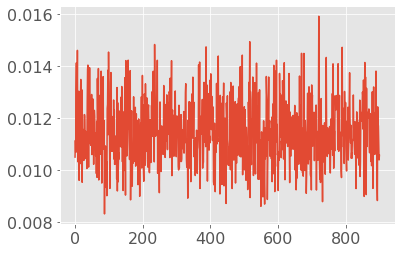

In [75]:
plt.plot(mod.traces['tau_squared'])

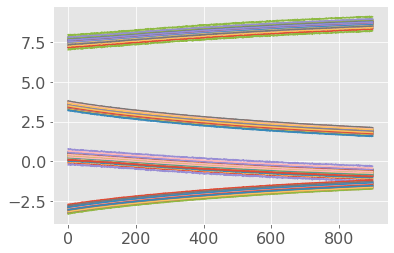

In [60]:
plt.plot(mod.traces['betas'][:,0,:]);
plt.plot(mod.traces['betas'][:,1,:]);
plt.plot(mod.traces['betas'][:,2,:]);
plt.plot(mod.traces['betas'][:,3,:]);

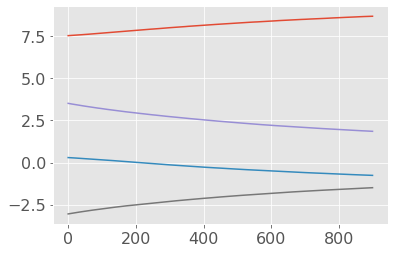

In [64]:
plt.plot(mod.traces['gamma'][:,0]);
plt.plot(mod.traces['gamma'][:,1]);
plt.plot(mod.traces['gamma'][:,2]);
plt.plot(mod.traces['gamma'][:,3]);

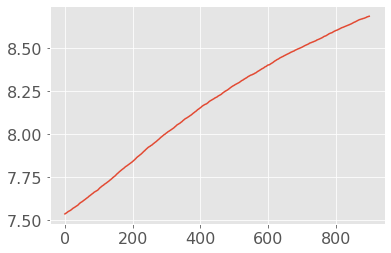

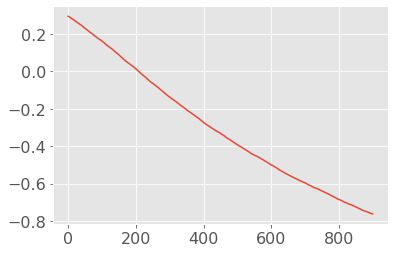

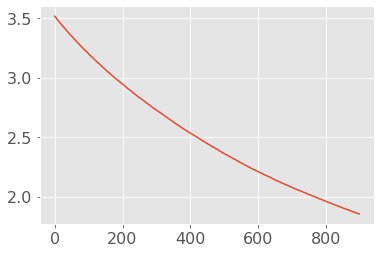

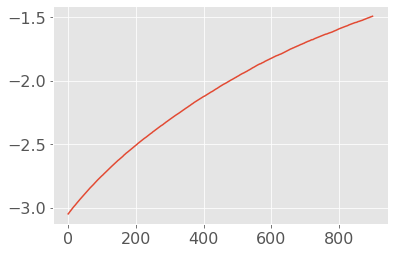

<Figure size 432x288 with 0 Axes>

In [73]:
for i in range(4):
    plt.plot(mod.traces['gamma'][:,i])
    plt.figure()




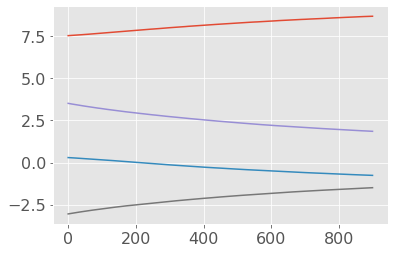

In [72]:
plt.plot(mod.traces['gamma']);